# MULTIPLE LINEAR REGRESSION

## Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load dataset
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [9]:
# Summary Statistics
print(data.describe())


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [28]:
data.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [32]:
# Fill missing values with the mean of the column
data['Price'] = data['Price'].fillna(data['Price'].mean())

In [34]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [39]:
x = data.drop(['Fuel_Type'],axis = 1)
x.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


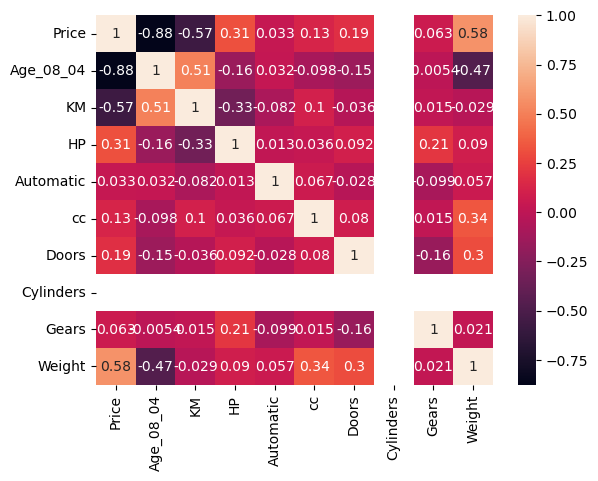

In [41]:
# Correlation Matrix
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##  Pre-process the Data for MLR

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [56]:
# Handle missing values
data = data.dropna()
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [60]:
# Encode categorical variables if any
data = pd.get_dummies(data, drop_first=True)
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [64]:
# Normalize/Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 0.76376268, -1.77196633, -0.57469494, ...,  1.75856113,
         2.87480715, -2.71087388],
       [ 0.83271485, -1.77196633,  0.11745379, ...,  1.75856113,
         2.87480715, -2.71087388],
       [ 0.88787659, -1.71818412, -0.71538641, ...,  1.75856113,
         2.87480715, -2.71087388],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -1.09191497,
        -0.34784942,  0.36888474],
       [-0.96004167,  0.75579727, -1.37670303, ..., -1.09191497,
        -0.34784942,  0.36888474],
       [-1.04278428,  1.0784905 , -1.82784925, ...,  0.78939926,
        -0.34784942,  0.36888474]])

In [68]:
# Split the data
X = data.drop('Price', axis=1)
y = data['KM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
 899          62   59295   86          0  1300      5          4      5   
 881          68   61568  110          0  1600      4          4      5   
 310          40   38653  110          0  1600      5          4      5   
 1145         75  101855  110          0  1600      5          4      5   
 31           22   35199   97          0  1400      3          4      5   
 ...         ...     ...  ...        ...   ...    ...        ...    ...   
 1095         76  125778  110          0  1600      3          4      5   
 1130         73  107108  110          0  1600      3          4      5   
 1294         80   71740  110          0  1600      5          4      5   
 860          63   64690   86          0  1300      3          4      5   
 1126         80  110000  110          0  1600      4          4      5   
 
       Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
 899     1035             False              T

##  Build Multiple Linear Regression Models

In [71]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [79]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [81]:
print(data.dtypes)


Price               int64
Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Cylinders           int64
Gears               int64
Weight              int64
Fuel_Type_Diesel     bool
Fuel_Type_Petrol     bool
dtype: object


In [83]:
# Example: Convert object types to float
data['Price'] = data['Price'].astype(float)


In [87]:
# Replace non-numeric values with NaN and then fill them or drop rows/columns
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750.0,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950.0,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950.0,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750.0,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845.0,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500.0,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250.0,70,16916,86,0,1300,3,4,5,1015,False,True


In [91]:
X = data.drop('Price', axis=1)
X = X.select_dtypes(exclude=['object'])
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,True,False
1,23,72937,90,0,2000,3,4,5,1165,True,False
2,24,41711,90,0,2000,3,4,5,1165,True,False
3,26,48000,90,0,2000,3,4,5,1165,True,False
4,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,False,True
1432,72,19000,86,0,1300,3,4,5,1015,False,True
1433,71,17016,86,0,1300,3,4,5,1015,False,True
1434,70,16916,86,0,1300,3,4,5,1015,False,True


In [93]:
# Model 1: Standard Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 Coefficients:", model1.coef_)

Model 1 Coefficients: [-8.30587212e-14  1.00000000e+00 -9.82990017e-14  2.74127137e-12
 -1.03892354e-15  2.05955183e-13  9.52912066e-22  2.21645908e-12
  1.61534523e-14 -2.34599496e-12 -2.98446796e-13]


In [122]:
# Model 2: Linear Regression with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model2 = LinearRegression()
model2.fit(X_poly, y_train)
print("Model 2 Coefficients:", model2.coef_)

Model 2 Coefficients: [ 4.96345313e-14 -3.49465316e-11  5.88235294e-02  1.13301498e-10
 -1.18877849e-11  7.68796864e-11  2.74212532e-11 -1.31379282e-14
  5.35846072e-11  1.11649421e-10  1.13662071e-11 -1.22215549e-11
  7.15737233e-12 -1.31058359e-15 -7.62086637e-12  4.36647576e-10
  5.24811124e-13  3.99280061e-11 -5.31888547e-11 -2.96024689e-10
  8.77899858e-13  1.91776593e-10 -7.09941382e-11 -2.60208521e-18
 -1.60258092e-14  1.76660336e-13  1.65839564e-15  1.61404744e-13
  2.35294118e-01  4.97728811e-13 -5.19376209e-15 -7.83206833e-13
 -3.44704950e-13  1.24457575e-11  3.65253252e-11  4.77308774e-12
  1.47962892e-09  4.51979750e-10  8.04252503e-10 -1.88772153e-11
 -1.87133571e-11  3.70768679e-11 -1.18540186e-11  6.34687644e-10
  6.09487325e-11 -4.74160746e-11  1.09201281e-11 -9.17776848e-10
  2.54109884e-21 -8.46062913e-11 -4.01501749e-14  6.28297026e-12
  3.07570147e-10 -4.13542836e-10  1.40294026e-13 -1.64600708e-10
  7.11689185e-11 -1.22720274e-10  1.09629873e-10 -4.34482042e-11
 -1

## Evaluate the Performance of the Models

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model3.predict(poly.transform(X_test))


In [112]:
# Evaluation Metrics for each model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

In [117]:
print("Model 1 Performance:")
evaluate_model(y_test, y_pred1)
print("Model 2 Performance:")
evaluate_model(y_test, y_pred3)


Model 1 Performance:
MAE: 2.6517811866108885e-11, MSE: 1.0503721596952758e-21, RMSE: 3.2409445532055557e-11, R-squared: 1.0
Model 2 Performance:
MAE: 1.9640895253556255e-08, MSE: 1.7299519273085668e-15, RMSE: 4.159269079187552e-08, R-squared: 1.0


##  Apply Lasso and Ridge Methods

In [130]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression Performance:")
evaluate_model(y_test, y_pred_lasso)

Lasso Regression Performance:
MAE: 5.2625646125460825e-05, MSE: 4.498992912194696e-09, RMSE: 6.707453251566273e-05, R-squared: 1.0


In [132]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression Performance:")
evaluate_model(y_test, y_pred_ridge)

Ridge Regression Performance:
MAE: 2.575055014898532e-09, MSE: 1.1683150713540062e-17, RMSE: 3.4180624209543134e-09, R-squared: 1.0


# Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?

## Normalization & Standardization:

Normalization scales the data to a range [0, 1] or [-1, 1] using min-max scaling. It’s particularly useful when your data has different units or scales.

Standardization rescales data to have a mean of 0 and a standard deviation of 1 using z-score scaling. It helps in centering the data and is often used when the data follows a Gaussian distribution.

Benefits:

Makes algorithms that rely on distance metrics (like KNN, SVM) perform better.

Speeds up convergence in gradient-based optimization algorithms (like linear regression).

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

## Techniques to Address Multicollinearity:

Variance Inflation Factor (VIF): Calculate VIF scores and remove features with a high VIF.

Principal Component Analysis (PCA): Reduces dimensionality by transforming variables into a new set of uncorrelated variables.

Ridge Regression: Adds a penalty to the regression model to shrink coefficient estimates and mitigate multicollinearity.

Lasso Regression: Similar to Ridge but with L1 regularization, which can shrink some coefficients to zero, effectively selecting a subset of features.